In [27]:
### Consigna
##### Tu tarea:
##### 1. Solicita el nombre, la edad y la lista de habilidades de un usuario.
##### 2. Procesa esta información a través de tres nodos que:

##### Primer nodo: Personaliza el campo del nombre con un saludo.
##### Segundo nodo: Describe la edad del usuario.
##### Tercer nodo: Lista las habilidades del usuario en una cadena de texto formateada.

##### 3.El resultado final debe ser un mensaje combinado con el siguiente formato:
#####   Salida: «¡Linda, bienvenida al sistema! ¡Tienes 31 años! Tus habilidades incluyen: Python,
#####   Aprendizaje Automático y LangGraph».

###### Sugerencia: Deberás usar el método `add_edge` dos veces.

In [28]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [29]:
class StateAgent(TypedDict):
    nombre: str
    edad: int
    habilidades: List[str]
    mensaje: str

In [30]:
from errno import EDEADLK


def nodo_1 (state: StateAgent) -> StateAgent:
    '''Personaliza el cambpo del nombre con un saludo'''
    state['mensaje'] = f'Hola! {state["nombre"]}'
    return state

def nodo_2 (state: StateAgent) -> StateAgent:
    '''Agrega la edad del usuario al menaje de saludo con nombre'''
    state['mensaje'] = state['mensaje'] + f' estas medio viejo che, tenes {state['edad']} años.'
    return state

def nodo_3 (state: StateAgent) -> StateAgent:
    '''Agrega la list de habilidades de la persona al ennsajde se saludo con nombre y edad'''
    state["mensaje"] = state['mensaje'] + f' Pero tenes conociminetos en {", ".join(state["habilidades"])}, quedas contratado.'
    return state

In [31]:
graph = StateGraph(StateAgent)

graph.add_node("nodo_1", nodo_1)
graph.add_node("nodo_2", nodo_2)
graph.add_node("nodo_3", nodo_3)

graph.set_entry_point("nodo_1")
graph.add_edge("nodo_1", "nodo_2")
graph.add_edge("nodo_2", "nodo_3")
graph.set_finish_point("nodo_3")

app = graph.compile()



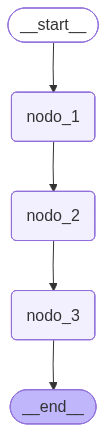

In [32]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [33]:
resultado = app.invoke({'nombre':'Zoilo', 'edad': '60', 'habilidades': ['AI', 'Python', 'LangGraph']})
print(resultado)

{'nombre': 'Zoilo', 'edad': '60', 'habilidades': ['AI', 'Python', 'LangGraph'], 'mensaje': 'Hola! Zoilo estas medio viejo che, tenes 60 años. Pero tenes conociminetos en AI, Python, LangGraph, quedas contratado.'}


In [34]:
resultado['mensaje']

'Hola! Zoilo estas medio viejo che, tenes 60 años. Pero tenes conociminetos en AI, Python, LangGraph, quedas contratado.'